#                            Effective method of diversifying in stock indices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data as wb
from datetime import datetime
import random

import matplotlib.pyplot as plt
%matplotlib inline 

from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

import locale
locale.setlocale(locale.LC_ALL, '')

'en_US.UTF-8'

The economy can be divided into the some major sectors and with the economic activities
reducing to a bare minimum, only the essential services are remaining active, therefore
currently consumer staples and utilities are supposed to outperform the stock market index.
The following sector indices were selected to analyze their performance during the 14 year
time horizon

In [2]:
index = ['DSTL', 'DSUT', 'DSRE', 'DSTC', 'DSFN', 'DSEN', 'DSHC', 'DSNC']

In [3]:
data = pd.read_excel("/Users/kan/Documents/project/Index.xlsx")
print(data)

            Date      DSTL      DSUT      DSRE      DSTC      DSFN      DSEN  \
0     06/30/2020  0.006101  0.004663  0.012615  0.019856  0.014322  0.022441   
1     06/29/2020  0.026158  0.019675  0.015996  0.012743  0.013133  0.015267   
2     06/26/2020 -0.024194 -0.010566 -0.019993 -0.026871 -0.036191 -0.036255   
3     06/25/2020  0.008971 -0.011411  0.012587  0.010813  0.022463  0.019211   
4     06/24/2020 -0.019859 -0.009426 -0.028325 -0.021519 -0.034350 -0.055600   
...          ...       ...       ...       ...       ...       ...       ...   
3460  09/05/2006  0.002907 -0.007842  0.008752  0.005263  0.003654  0.010824   
3461  09/01/2006  0.010280 -0.001365 -0.005545  0.002668  0.001430  0.011982   
3462  08/31/2006 -0.001733  0.011826  0.000572 -0.003265  0.001209 -0.005966   
3463  08/30/2006  0.001669 -0.006738  0.008204  0.009275  0.001564 -0.016110   
3464  08/29/2006       NaN       NaN       NaN       NaN       NaN       NaN   

          DSHC      DSNC  
0     0.0182

In [4]:
data

,Date,DSTL,DSUT,DSRE,DSTC,DSFN,DSEN,DSHC,DSNC
0,06/30/2020,0.006101,0.004663,0.012615,0.019856,0.014322,0.022441,0.018263,0.014794
1,06/29/2020,0.026158,0.019675,0.015996,0.012743,0.013133,0.015267,0.007342,0.021993
2,06/26/2020,-0.024194,-0.010566,-0.019993,-0.026871,-0.036191,-0.036255,-0.012670,-0.023924
3,06/25/2020,0.008971,-0.011411,0.012587,0.010813,0.022463,0.019211,0.010801,0.009187
4,06/24/2020,-0.019859,-0.009426,-0.028325,-0.021519,-0.034350,-0.055600,-0.026235,-0.022178
...,...,...,...,...,...,...,...,...,...
3460,09/05/2006,0.002907,-0.007842,0.008752,0.005263,0.003654,0.010824,-0.003286,-0.004069
3461,09/01/2006,0.010280,-0.001365,-0.005545,0.002668,0.001430,0.011982,0.004969,0.004549
3462,08/31/2006,-0.001733,0.011826,0.000572,-0.003265,0.001209,-0.005966,-0.001695,0.000107
3463,08/30/2006,0.001669,-0.006738,0.008204,0.009275,0.001564,-0.016110,0.000216,0.000000


In [5]:
subset = data.loc[:,'DSTL':'DSNC']
subset

,DSTL,DSUT,DSRE,DSTC,DSFN,DSEN,DSHC,DSNC
0,0.006101,0.004663,0.012615,0.019856,0.014322,0.022441,0.018263,0.014794
1,0.026158,0.019675,0.015996,0.012743,0.013133,0.015267,0.007342,0.021993
2,-0.024194,-0.010566,-0.019993,-0.026871,-0.036191,-0.036255,-0.012670,-0.023924
3,0.008971,-0.011411,0.012587,0.010813,0.022463,0.019211,0.010801,0.009187
4,-0.019859,-0.009426,-0.028325,-0.021519,-0.034350,-0.055600,-0.026235,-0.022178
...,...,...,...,...,...,...,...,...
3460,0.002907,-0.007842,0.008752,0.005263,0.003654,0.010824,-0.003286,-0.004069
3461,0.010280,-0.001365,-0.005545,0.002668,0.001430,0.011982,0.004969,0.004549
3462,-0.001733,0.011826,0.000572,-0.003265,0.001209,-0.005966,-0.001695,0.000107
3463,0.001669,-0.006738,0.008204,0.009275,0.001564,-0.016110,0.000216,0.000000


In [6]:
data['Date'] =  pd.to_datetime(data['Date'])

In [7]:
subset.corr()

,DSTL,DSUT,DSRE,DSTC,DSFN,DSEN,DSHC,DSNC
DSTL,1.000000,0.671559,0.623733,0.668450,0.675615,0.605725,0.668065,0.752335
DSUT,0.671559,1.000000,0.627378,0.616157,0.600465,0.633078,0.674245,0.768855
DSRE,0.623733,0.627378,1.000000,0.675710,0.868192,0.578608,0.614790,0.718033
DSTC,0.668450,0.616157,0.675710,1.000000,0.756714,0.711011,0.784010,0.818470
DSFN,0.675615,0.600465,0.868192,0.756714,1.000000,0.673864,0.707036,0.774946
DSEN,0.605725,0.633078,0.578608,0.711011,0.673864,1.000000,0.669010,0.719592
DSHC,0.668065,0.674245,0.614790,0.784010,0.707036,0.669010,1.000000,0.832188
DSNC,0.752335,0.768855,0.718033,0.818470,0.774946,0.719592,0.832188,1.000000


In [8]:
subset.mean()

DSTL    0.000117
DSUT    0.000228
DSRE    0.000247
DSTC    0.000598
DSFN    0.000204
DSEN    0.000056
DSHC    0.000420
DSNC    0.000295
dtype: float64

In [9]:
subset.std()

DSTL    0.013176
DSUT    0.012630
DSRE    0.021184
DSTC    0.014656
DSFN    0.019987
DSEN    0.019158
DSHC    0.011527
DSNC    0.010597
dtype: float64

In [10]:
subset.corr()

,DSTL,DSUT,DSRE,DSTC,DSFN,DSEN,DSHC,DSNC
DSTL,1.000000,0.671559,0.623733,0.668450,0.675615,0.605725,0.668065,0.752335
DSUT,0.671559,1.000000,0.627378,0.616157,0.600465,0.633078,0.674245,0.768855
DSRE,0.623733,0.627378,1.000000,0.675710,0.868192,0.578608,0.614790,0.718033
DSTC,0.668450,0.616157,0.675710,1.000000,0.756714,0.711011,0.784010,0.818470
DSFN,0.675615,0.600465,0.868192,0.756714,1.000000,0.673864,0.707036,0.774946
DSEN,0.605725,0.633078,0.578608,0.711011,0.673864,1.000000,0.669010,0.719592
DSHC,0.668065,0.674245,0.614790,0.784010,0.707036,0.669010,1.000000,0.832188
DSNC,0.752335,0.768855,0.718033,0.818470,0.774946,0.719592,0.832188,1.000000


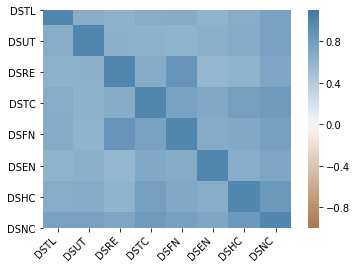

In [11]:
#Plotting a heatmap of the correlation matrix among the selected indices to visually 
# illustrate the strength of the correlation

corr = subset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1.0, vmax=1.1, center=0,
    cmap=sns.diverging_palette(40, 240, n= 450),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_xticklabels(),
    rotation=360,
    horizontalalignment='right'
);

In [12]:
subset.cov()

,DSTL,DSUT,DSRE,DSTC,DSFN,DSEN,DSHC,DSNC
DSTL,0.000174,0.000112,0.000174,0.000129,0.000178,0.000153,0.000101,0.000105
DSUT,0.000112,0.000160,0.000168,0.000114,0.000152,0.000153,0.000098,0.000103
DSRE,0.000174,0.000168,0.000449,0.000210,0.000368,0.000235,0.000150,0.000161
DSTC,0.000129,0.000114,0.000210,0.000215,0.000222,0.000200,0.000132,0.000127
DSFN,0.000178,0.000152,0.000368,0.000222,0.000399,0.000258,0.000163,0.000164
DSEN,0.000153,0.000153,0.000235,0.000200,0.000258,0.000367,0.000148,0.000146
DSHC,0.000101,0.000098,0.000150,0.000132,0.000163,0.000148,0.000133,0.000102
DSNC,0.000105,0.000103,0.000161,0.000127,0.000164,0.000146,0.000102,0.000112


In [13]:
#A random number generator with a seed of 100 is used to generate weights, which are the allocations 
#of stock portfolios

np.random.seed(100)

portfolio = 10000           #10,000 different weighted portfolios will be generated

all_weights = np.zeros((portfolio, len(subset.columns) ))
ret_arr = np.zeros(portfolio)
vol_arr = np.zeros(portfolio)
sharp_arr = np.zeros(portfolio)

for x in range(portfolio):

    weights = np.array(np.random.random(len(subset.columns))) 
    weights = weights / np.sum(weights)         #The weights have been normalized so that the total is equal to 1.
    all_weights[x, :] = weights
    
    exp_ret = np.sum((subset.mean() * weights) * 252) #expected returns for those respective weights
    ret_arr[x] = exp_ret
    
    exp_vol = np.sqrt(np.dot(weights.T, np.dot(subset.cov() * 252, weights))) 
    vol_arr[x] = exp_vol                              #Expected volatility for those respective weights
    
#The Sharpe Ratio is used as a metric to evaluate the lucrativeness of the portfolio.
#The Sharpe Ratio is the ratio of the expected returns to the expected volatility and quantifies the maximum 
#return an investor can expect for a given risk.
#The higher the Sharpe Ratio the better.
    
    SR = ret_arr[x] / vol_arr[x]
    sharp_arr[x] = SR    

In [14]:
sharp_arr.argmax()   #Argmax will return the index for the highest value of sharpe ratio  

max_vol = vol_arr[sharp_arr.argmax()]
max_ret = ret_arr[sharp_arr.argmax()]
best_weights = all_weights[sharp_arr.argmax(), :]

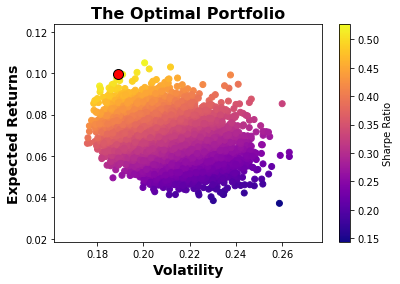

In [15]:
plt.scatter(x = vol_arr, y = ret_arr, c = sharp_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility', fontsize = 14, weight = 'bold')
plt.ylabel('Expected Returns', fontsize = 14, weight = 'bold')
plt.title('The Optimal Portfolio', fontsize = 16, weight = 'bold')

#Finding the portfolio with the best sharpe ratio
plt.scatter(max_vol, max_ret, c = 'red', s = 100, edgecolors = 'black')

In [16]:
print('Final weight allocation \n')

for i in range(0, len(index)):
#    print('The optimal allocation would be', round(best_weights[i] * 100,2))


    print('The optimal allocation would be', round(best_weights[i] * 100,2), '% to', index[i])  
    

Final weight allocation 

The optimal allocation would be 2.95 % to DSTL
The optimal allocation would be 6.37 % to DSUT
The optimal allocation would be 1.69 % to DSRE
The optimal allocation would be 29.47 % to DSTC
The optimal allocation would be 1.49 % to DSFN
The optimal allocation would be 8.54 % to DSEN
The optimal allocation would be 34.47 % to DSHC
The optimal allocation would be 15.03 % to DSNC


Monte Carlo Simulation

In [17]:
daily_ret = max_ret/252                      #Daily stock returns are used
std_daily = max_vol/(np.sqrt(252))           #Daily volatility is used

In [18]:
sim = pd.DataFrame()         #An empty Dataframe to store the expected values 
iterations = 10000            #10000 simulations will be run to generate an expected amount after 1 year     

for x in range(iterations):
    t_intervals = 252               # The number of working days in a year
    a = 100000                        #Initial amount invested
    stream = []
    for i in range(t_intervals):
        end = round(a * (1 + np.random.normal(daily_ret,std_daily)))
        
        stream.append(end)
        
        a = end
        
    sim[x] = stream
    
sim

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100887,97769,100110,99215,97867,101278,99796,99586,99792,99516,...,99791,99643,98195,99336,98260,98606,99571,102463,99294,99719
1,101338,97692,99659,99859,98271,101014,101835,100888,99922,101547,...,100186,98229,98379,98943,99358,97462,99123,103234,100595,99277
2,100111,99216,98794,100135,98420,101876,104146,100560,97876,101522,...,100534,97567,98134,99043,99237,97779,99507,103990,100999,100924
3,100183,98642,98190,100140,95469,104223,102420,102411,98639,99857,...,98917,97887,99625,98787,97967,96520,98685,104162,101640,97551
4,100961,98129,96673,97653,96489,105395,103101,103220,98741,98304,...,99612,96272,102692,99161,97417,96291,98023,102875,102647,98646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,112142,102857,159100,98146,116025,122380,136874,112344,91047,95824,...,138720,96668,100672,97686,96906,84147,99815,139140,75710,106704
248,112366,103509,161635,97642,115010,123868,135940,111887,91423,93767,...,140212,97409,100950,98046,95529,82528,101119,136355,75401,104358
249,108510,103875,163318,96167,114040,124386,132783,109600,91129,95524,...,143901,96299,99464,97989,94673,82434,100295,135978,75034,102093
250,109675,103358,163187,95846,114296,125287,131131,107102,91318,97392,...,146407,95539,99143,100619,96628,83393,100420,137539,73767,102761


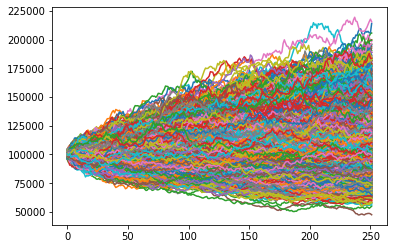

In [19]:
plt.plot(sim)
plt.show()   

In [21]:
print('Expected Amount at the end of 1 year: ', locale.currency(np.mean(sim.loc[251]),grouping = True))
print('Maximum Expected value: ',locale.currency(np.max(sim.loc[251]),grouping = True))
print('Minimum Expected value: ',locale.currency(np.min(sim.loc[251]),grouping = True))

Expected Amount at the end of 1 year:  $110,480.15
Maximum Expected value:  $215,377.00
Minimum Expected value:  $47,524.00
